### Importamos librerías

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, make_scorer, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.externals.joblib import dump, load
import optuna
import os
from collections import Counter
import plotly.graph_objects as go

In [32]:
df = pd.read_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data','cerebrovascular.csv'))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Análisis

In [33]:
Counter(df['stroke'])

Counter({0: 42617, 1: 783})

In [34]:
df.drop('id', axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [36]:
df.drop(['hypertension', 'heart_disease', 'stroke'], axis=1).describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


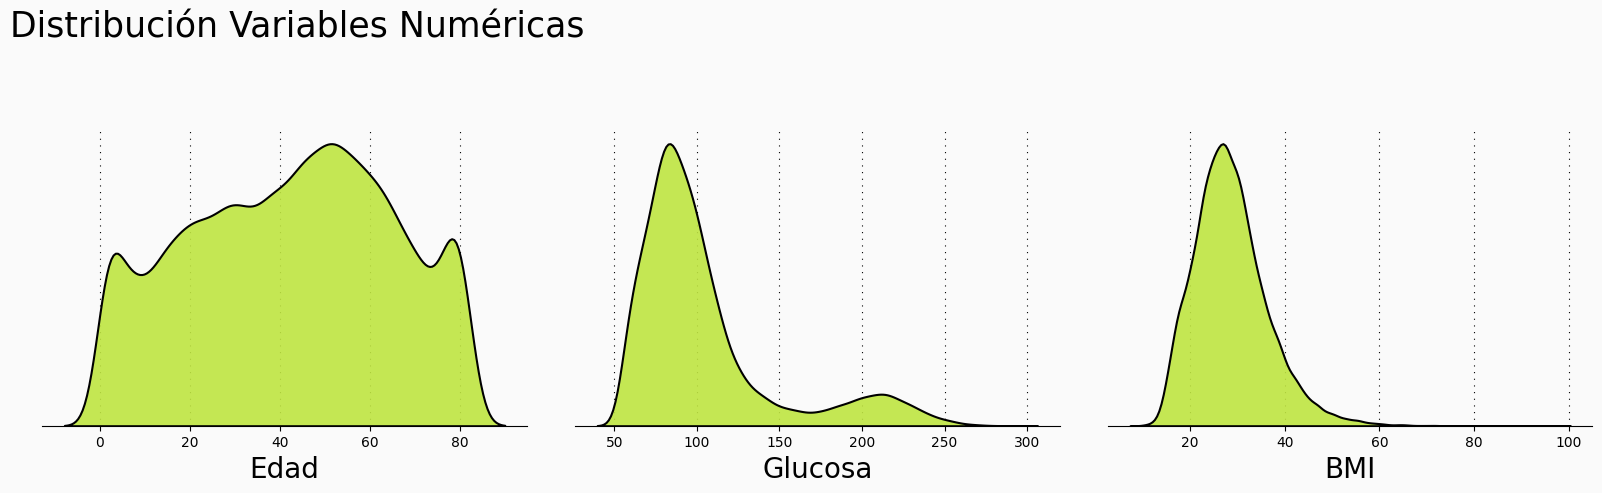

In [37]:
fig = plt.figure(figsize=(20, 20), facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
conts = ['age','avg_glucose_level','bmi']
background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#bfe541', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='black', linestyle=':', dashes=(1,5))
        plot += 1
        
ax0.set_xlabel('Edad', fontsize=20)
ax1.set_xlabel('Glucosa', fontsize=20)
ax2.set_xlabel('BMI', fontsize=20)
ax0.text(-20, 0.022, 'Distribución Variables Numéricas', fontsize=25)

plt.show()
# fig.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', 'image', "var_ent.jpg"))

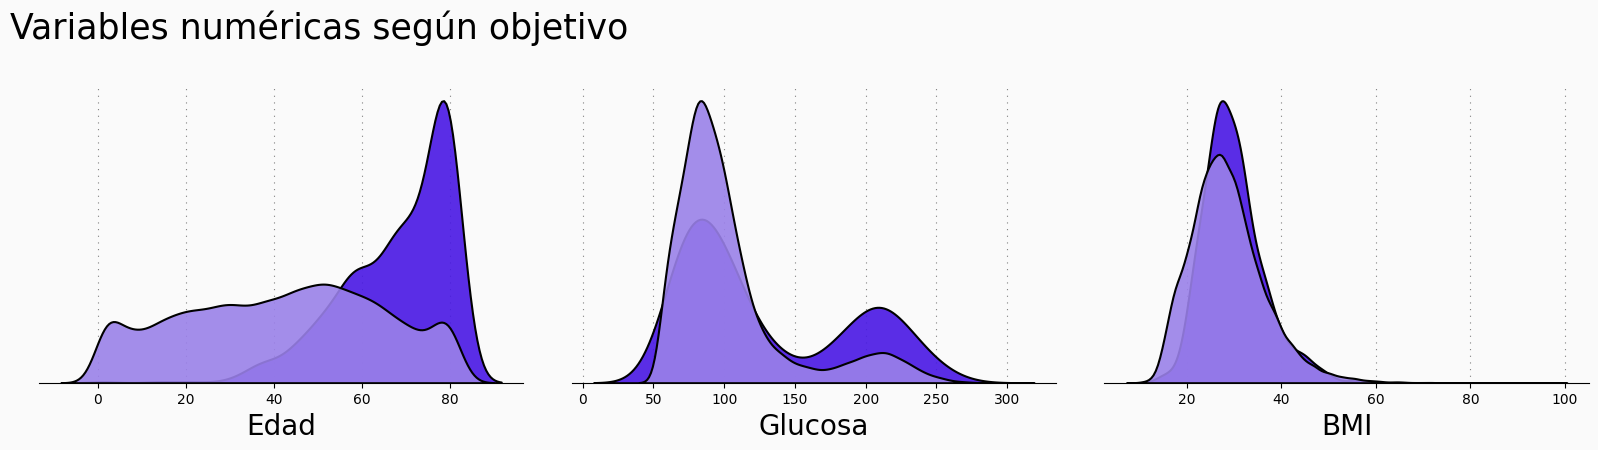

In [38]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]
conts = ['age','avg_glucose_level','bmi']
background_color = "#fafafa"

fig = plt.figure(figsize=(20, 20),facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#4817e4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9a81e9', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Edad', fontsize=20)
ax1.set_xlabel('Glucosa', fontsize=20)
ax2.set_xlabel('BMI', fontsize=20)

ax0.text(-20, 0.056, 'Variables numéricas según objetivo', fontsize=25)

plt.show()
# fig.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "var_sep.jpg"))

In [39]:
columnas = ['age', 'avg_glucose_level', 'bmi']
nombres = ['Edad', 'Nivel de Glucosa', 'BMI']
colors = ['blue', 'green', 'red']

fig = go.Figure()
for num, i in enumerate(columnas):
    fig.add_trace(go.Box(y=df[i], name=nombres[num], marker_color=colors[num]))#, boxmean='sd', boxpoints='all', jitter=0.3, pointpos=-1.8, marker=dict(size=5, opacity=0.5), line=dict(width=2)))
    # fig.update_traces(marker=dict(color=colors[columnas.index(i)]))
fig.update_layout(title_text='Boxplot de variables numéricas', title_x=0.5, showlegend=False, title_font_color='black', width=1000, height=600)
fig.show()
fig.write_image(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "boxplot.png"))

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [41]:
gender = pd.value_counts(df['gender'])
gender

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

In [42]:
labels = ['Mujer', 'Hombre', 'Otro']
values = [25665, 17724, 11]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value', hole=.3, rotation=0)])
fig.update_layout(legend=dict(orientation="v", xanchor="center", x=0.75, y=0.5)) # title_text='Distribución de Género', title_x=0.5, title_y=0.9, title_font=dict(size=25), 
fig.update_traces(textfont_size=12, pull=[0.1, 0.1], marker=dict(colors=['#4817e4', '#9a81e9']), hoverinfo='label+percent+value')
fig.show()
fig.write_image(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "gender.png"))

In [43]:
pd.crosstab(index=df['stroke'], columns=df['gender'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

gender,Female,Male,Other,All
stroke,,,,
0,58.142857,40.02765,0.025346,98.195853
1,0.993088,0.81106,0.000000,1.804147
All,59.135945,40.83871,0.025346,100.000000


In [44]:
hyper = pd.value_counts(df['hypertension'])
hyper

hypertension
0    39339
1     4061
Name: count, dtype: int64

In [68]:
labels = ['Negativo', 'Positivo']
values = [39339, 4061]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value', hole=.3, rotation=-90)])
fig.update_layout(legend=dict(orientation="v", xanchor="center", x=0.75, y=0.5)) # title_text='Distribución de Género', title_x=0.5, title_y=0.9, title_font=dict(size=25), fig.update_traces(textfont_size=12, pull=[0.1, 0.1], marker=dict(colors=['#4817e4', '#9a81e9']), hoverinfo='label+percent+value')
fig.update_traces(textfont_size=12, pull=[0.1, 0.1], marker=dict(colors=['#4817e4', '#9a81e9']), hoverinfo='label+percent+value')
fig.show()
fig.write_image(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "hiper.png"))

In [46]:
pd.crosstab(index=df['stroke'], columns=df['hypertension'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

hypertension,0,1,All
stroke,,,
0,89.299539,8.896313,98.195853
1,1.343318,0.460829,1.804147
All,90.642857,9.357143,100.000000


In [47]:
heart = pd.value_counts(df['heart_disease'])
heart

heart_disease
0    41338
1     2062
Name: count, dtype: int64

In [69]:
labels = ['Negativo', 'Positivo']
values = [41338, 2062]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value', hole=.3, rotation=-90)])
fig.update_layout(legend=dict(orientation="v", xanchor="center", x=0.75, y=0.5)) # title_text='Distribución de Género', title_x=0.5, title_y=0.9, title_font=dict(size=25), 
fig.update_traces(textfont_size=12, pull=[0.1, 0.1], marker=dict(colors=['#4817e4', '#9a81e9']), hoverinfo='label+percent+value')
fig.show()
fig.write_image(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "cardio.png"))

In [49]:
pd.crosstab(index=df['stroke'], columns=df['heart_disease'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

heart_disease,0,1,All
stroke,,,
0,93.852535,4.343318,98.195853
1,1.396313,0.407834,1.804147
All,95.248848,4.751152,100.000000


In [50]:
married = pd.value_counts(df['ever_married'])
married

ever_married
Yes    27938
No     15462
Name: count, dtype: int64

In [76]:
labels = ['Positivo', 'Negativo']
values = [27938, 15462]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value', hole=.3, rotation=0)])
fig.update_layout(legend=dict(orientation="v", xanchor="center", x=0.675, y=0.5)) # title_text='Distribución de Género', title_x=0.5, title_y=0.9, title_font=dict(size=25), 
fig.update_traces(textfont_size=12, pull=[0.1, 0.1], marker=dict(colors=['#4817e4', '#9a81e9']), hoverinfo='label+percent+value')
fig.show()
fig.write_image(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "matr.png"))

In [52]:
pd.crosstab(index=df['stroke'], columns=df['ever_married'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

ever_married,No,Yes,All
stroke,,,
0,35.442396,62.753456,98.195853
1,0.184332,1.619816,1.804147
All,35.626728,64.373272,100.000000


In [53]:
work = pd.value_counts(df['work_type'])
work

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

In [78]:
labels = ['Privado', 'Autónomo', 'Joven', 'Gobierno', 'Nunca']
values = [24834, 6793, 6156, 5440, 177]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value', hole=0.3, rotation=0)])
fig.update_layout(legend=dict(orientation="v", xanchor="center", x=0.775, y=0.5)) # title_text='Distribución de Género', title_x=0.5, title_y=0.9, title_font=dict(size=25), 
fig.update_traces(textfont_size=12, pull=[0.1, 0.1], marker=dict(colors=['#4817e4', '#9a81e9']), hoverinfo='label+percent+value', insidetextorientation='horizontal')
fig.show()
fig.write_image(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "work.png"))

In [55]:
pd.crosstab(index=df['stroke'], columns=df['work_type'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

work_type,Govt_job,Never_worked,Private,Self-employed,children,All
stroke,,,,,,
0,12.329493,0.407834,56.205069,15.073733,14.179724,98.195853
1,0.205069,0.000000,1.016129,0.578341,0.004608,1.804147
All,12.534562,0.407834,57.221198,15.652074,14.184332,100.000000


In [56]:
residence = pd.value_counts(df['Residence_type'])
residence

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

In [81]:
labels = ['Urbano', 'Rural']
values = [21756, 21644]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value', hole=.3, rotation=180)])
fig.update_layout(legend=dict(orientation="v", xanchor="center", x=0.675, y=0.5)) # title_text='Distribución de Género', title_x=0.5, title_y=0.9, title_font=dict(size=25), 
fig.update_traces(textfont_size=12, pull=[0.1, 0.1], marker=dict(colors=['#4817e4', '#9a81e9']), hoverinfo='label+percent+value')
fig.show()
fig.write_image(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "residencia.png"))

In [58]:
pd.crosstab(index=df['stroke'], columns=df['Residence_type'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

Residence_type,Rural,Urban,All
stroke,,,
0,48.986175,49.209677,98.195853
1,0.884793,0.919355,1.804147
All,49.870968,50.129032,100.000000


In [59]:
smoke = pd.value_counts(df['smoking_status'].fillna('Unknown'))
smoke

smoking_status
never smoked       16053
Unknown            13292
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [90]:
labels = ['Nunca', 'Desconocido', 'Pasado', 'Fumador']
values = [16053, 13292, 7493, 6562]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value', hole=.3, rotation=0)])
fig.update_layout(legend=dict(orientation="v", xanchor="center", x=0.675, y=0.5)) # title_text='Distribución de Género', title_x=0.5, title_y=0.9, title_font=dict(size=25), 
fig.update_traces(textfont_size=12, pull=[0.1, 0.1], marker=dict(colors=['#4817e4', '#9a81e9']), hoverinfo='label+percent+value', insidetextorientation='horizontal', textposition='inside')
fig.show()
fig.write_image(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "tabaco.png"))

In [61]:
pd.crosstab(index=df['stroke'], columns=df['smoking_status'].fillna('Unknown'), margins=True).apply(lambda r: r/len(df) *100, axis=1)

smoking_status,Unknown,formerly smoked,never smoked,smokes,All
stroke,,,,,
0,30.292627,16.755760,36.334101,14.813364,98.195853
1,0.334101,0.509217,0.654378,0.306452,1.804147
All,30.626728,17.264977,36.988479,15.119816,100.000000


### Procesamiento

In [32]:
# mean_age = np.mean(df['age'])
# std_dev_age = np.std(df['age'])

# # More than 3 standard deviations from the mean an outlier
# threshold = 3

# #create the condition to find outliers
# outliers_age = df['age'][np.abs(df['age'] - mean_age) > threshold * std_dev_age]
# print(outliers_age)

In [33]:
# mean_glucose = np.mean(df['avg_glucose_level'])
# std_dev_glucose = np.std(df['avg_glucose_level'])

# # More than 3 standard deviations from the mean an outlier
# threshold = 3

# # Create the condition to find outliers
# outliers_glucose = df['avg_glucose_level'][np.abs(df['avg_glucose_level'] - mean_glucose) > threshold * std_dev_glucose]
# print(outliers_glucose)

# # Delete outliers from dataset
# df.drop(outliers_glucose.index, inplace = True)

In [34]:
# condition = df[(df['bmi'] > 60)].index
# df.drop(condition, inplace=True)

### Transformación

In [35]:
len(df)

43400

In [36]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(int)
df['ever_married'] = df['ever_married'].replace({'No':0,'Yes':1}).astype(int)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(int)
df.smoking_status = df.smoking_status.fillna('nan')

In [37]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
binary_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']
categorical_features = ['work_type', 'smoking_status']
target = 'stroke'

X_cat_features = df[categorical_features]
print("Categorical features: ", list(X_cat_features.columns)) # + co_loader_columns)

# oHec = OneHotEncoder()
# X_enc = oHec.fit_transform(X_cat_features)
# X_cat_features = pd.DataFrame(X_enc.toarray(), columns=oHec.get_feature_names_out())

print("Numerical features: ", numerical_features)
scaler = StandardScaler()
X_num_features = scaler.fit_transform(df[numerical_features])
X_num_features = pd.DataFrame(X_num_features, columns=numerical_features)

X_bin_features = df[binary_features]
    
X = pd.concat([X_num_features.reset_index(drop=True), X_bin_features.reset_index(drop=True), X_cat_features.reset_index(drop=True)], axis=1)     
y = df[target]     
print("Target (dependent) variable: ", target)

Categorical features:  ['work_type', 'smoking_status']
Numerical features:  ['age', 'avg_glucose_level', 'bmi']
Target (dependent) variable:  stroke


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43400 non-null  float64
 1   avg_glucose_level  43400 non-null  float64
 2   bmi                41938 non-null  float64
 3   gender             43400 non-null  int64  
 4   hypertension       43400 non-null  int64  
 5   heart_disease      43400 non-null  int64  
 6   ever_married       43400 non-null  int64  
 7   Residence_type     43400 non-null  int64  
 8   work_type          43400 non-null  object 
 9   smoking_status     43400 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 3.3+ MB


Guardamos objetos de OneHotEncoder y StandardScaler

In [39]:
with open(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'scaler'), 'wb') as f: 
    pickle.dump(scaler, f)

# with open(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'encoder'), 'wb') as f: 
#     pickle.dump(oHec, f)

In [40]:
X.isnull().sum()

age                     0
avg_glucose_level       0
bmi                  1462
gender                  0
hypertension            0
heart_disease           0
ever_married            0
Residence_type          0
work_type               0
smoking_status          0
dtype: int64

Imputamos valores nulos

In [41]:
# Fill NaN values with KNN imputer on the numerical features
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X[numerical_features])
X_imputed = pd.DataFrame(X_imputed, columns=numerical_features)
X = pd.concat([X_imputed.reset_index(drop=True), X[binary_features].reset_index(drop=True), X[categorical_features].reset_index(drop=True)], axis=1) 
X.isnull().sum()

age                  0
avg_glucose_level    0
bmi                  0
gender               0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
work_type            0
smoking_status       0
dtype: int64

#### SMOTE NC

Aplicamos SMOTE NC antes de transformar los categóricos con OneHotEncoder

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43400 non-null  float64
 1   avg_glucose_level  43400 non-null  float64
 2   bmi                43400 non-null  float64
 3   gender             43400 non-null  int64  
 4   hypertension       43400 non-null  int64  
 5   heart_disease      43400 non-null  int64  
 6   ever_married       43400 non-null  int64  
 7   Residence_type     43400 non-null  int64  
 8   work_type          43400 non-null  object 
 9   smoking_status     43400 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 3.3+ MB


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
# def objective(trial):

#     sampling_strategy = trial.suggest_float('sampling_strategy', 0.1, 1.0, step=0.1)
#     k_neighbors = trial.suggest_int('k_neighbors', 1, 9, step=1)

#     smote = SMOTENC(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, categorical_features=[8, 9], random_state=42)

#     X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#     # OneHotEncoder
#     X_train_res_cat = X_train_res.iloc[:, 8:10]
#     X_test_cat = X_test.iloc[:, 8:10]
#     X_train_res_num = X_train_res.iloc[:, 0:8]
#     X_test_num = X_test.iloc[:, 0:8]
#     oHec = OneHotEncoder(drop='first')
#     X_train_res_cat = oHec.fit_transform(X_train_res_cat)
#     X_test_enc_cat = oHec.transform(X_test_cat)
#     X_train_res_cat = pd.DataFrame(X_train_res_cat.toarray(), columns=oHec.get_feature_names_out())
#     X_test_enc_cat = pd.DataFrame(X_test_enc_cat.toarray(), columns=oHec.get_feature_names_out())
#     X_train_res = pd.concat([X_train_res_num.reset_index(drop=True), X_train_res_cat.reset_index(drop=True)], axis=1)
#     X_test_enc = pd.concat([X_test_num.reset_index(drop=True), X_test_enc_cat.reset_index(drop=True)], axis=1)

#     model = RandomForestClassifier()
#     model.fit(X_train_res, y_train_res)

#     y_pred = np.round(model.predict(X_test_enc))

#     precision = precision_score(y_test,y_pred)
#     recall = recall_score(y_test,y_pred)
#     f1 = f1_score(y_test,y_pred)
#     roc = roc_auc_score(y_test,y_pred)

#     trial.set_user_attr('precision', precision)
#     trial.set_user_attr('recall', recall)
#     trial.set_user_attr('f1', f1)
   
#     return roc

# study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
# study.optimize(objective, n_jobs=-1, n_trials=100)

In [47]:
# print(study.best_params)
# print(study.best_value)

In [44]:
X_train.reset_index(drop=True, inplace=True), X_test.reset_index(drop=True, inplace=True), y_train.reset_index(drop=True, inplace=True), y_test.reset_index(drop=True, inplace=True)
len(X_train), len(X_test), len(y_train), len(y_test)

(34720, 8680, 34720, 8680)

In [45]:
# smote_params = study.best_params
# smote_params['categorical_features'] = [8,9]
# smote_params['random_state'] = 0
smote_params = {'k_neighbors': 9, 'sampling_strategy': 1.0, 'categorical_features': [8, 9], 'random_state': 0}
smote = SMOTENC(**smote_params)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# X_test_res, y_test_res = smote.fit_resample(X_test, y_test)

X_train_res_cat = X_train_res.iloc[:, 8:10]
X_test_cat = X_test.iloc[:, 8:10]
X_train_res_num = X_train_res.iloc[:, 0:8]
X_test_num = X_test.iloc[:, 0:8]

oHec = OneHotEncoder(drop='first')
X_train_res_cat = oHec.fit_transform(X_train_res_cat)
X_test_cat = oHec.transform(X_test_cat)
X_train_res_cat = pd.DataFrame(X_train_res_cat.toarray(), columns=oHec.get_feature_names_out())
X_test_cat = pd.DataFrame(X_test_cat.toarray(), columns=oHec.get_feature_names_out())
X_train_res = pd.concat([X_train_res_num.reset_index(drop=True), X_train_res_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_num.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)
y_train_res = pd.DataFrame(y_train_res, columns=['stroke'])

X_train_smote, y_train_smote = X_train_res[len(X_train):], y_train_res[len(y_train):]
synthetic_rows = list(X_train_smote.index)

In [51]:
# # Define the categorical features indices
# categorical_features = [8, 9]

# pipeline = Pipeline([
#     ('smote_nc', SMOTENC(categorical_features=categorical_features, random_state=42)),
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# param_grid = {
#     'smote_nc__sampling_strategy': [0.2, 0.5, 0.75, 1.0],
#     'smote_nc__k_neighbors': [1, 3, 5, 7, 9],
#     'classifier__n_estimators': [100, 150, 200],
#     'classifier__max_depth': [10, 15, 20, None]
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f'Best parameters: {best_params}')
# print(f'Best score: {best_score}')

In [52]:
# print("Best parameters found: ", best_params)
# print("Best cross-validation score: ", best_score)

# # Predict using the best estimator
# y_pred = grid_search.best_estimator_.predict(X_test)

### Selección de características (No integrado)

Wrapper

In [53]:
# model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
# rfe = RFE(estimator=model_tree)
# rfe_model = rfe.fit(X, y)
# print("Número de características seleccionadas: ", rfe_model.n_features_)
# print("Atributos seleccionados: ", rfe_model.support_)
# print("Ranking de características: ", rfe_model.ranking_)

In [54]:
# imp_features = np.sort(rfe.get_support(1))

In [55]:
# X = X[X.columns[imp_features]]

### Modelos de clasificación

In [ ]:
models = []
models.extend(
        ['XGBClassifier',XGBClassifier(random_state=0)],
        ['Logistic Regression',LogisticRegression(random_state=0)],
        ['SVC',SVC(random_state=0, probability=True)],
        ['KNeigbors',KNeighborsClassifier()],
        ['GaussianNB',GaussianNB()],
        ['DecisionTree',DecisionTreeClassifier(random_state=0)],
        ['RandomForest',RandomForestClassifier(random_state=0)],
        ['AdaBoostClassifier',AdaBoostClassifier()])

In [49]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    cm = confusion_matrix(y_test,y_pred)

    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
    auc_precision_recall = auc(recalls, precisions)

    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Balanced Accuracy Score: {:.2f} %\n',balanced_accuracy_score(y_test,y_pred))
    print('Accuracy Score: {:.2f} %\n',accuracy_score(y_test,y_pred))
    print('ROC AUC Score: {:.2f}\n'.format(roc))
    print('Precision: {:.2f}\n'.format(precision))
    print('Recall: {:.2f}\n'.format(recall))
    print('Precision recall curve AUC: {:.2f}\n'.format(auc_precision_recall))
    print('F1 Score: {:.2f}\n'.format(f1))
    print('-'*40)
    lst_2.append(models[m][0])
    lst_2.append(balanced_accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(auc_precision_recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[8038  485]
 [ 129   28]]
Balanced Accuracy Score: {:.2f} %
 0.560719551666491
Accuracy Score: {:.2f} %
 0.9292626728110599
ROC AUC Score: 0.56

Precision: 0.05

Recall: 0.18

Precision recall curve AUC: 0.04

F1 Score: 0.08

----------------------------------------
Logistic Regression :
[[6426 2097]
 [  43  114]]
Balanced Accuracy Score: {:.2f} %
 0.7400372614827917
Accuracy Score: {:.2f} %
 0.7534562211981567
ROC AUC Score: 0.74

Precision: 0.05

Recall: 0.73

Precision recall curve AUC: 0.08

F1 Score: 0.10

----------------------------------------
SVC :
[[6750 1773]
 [  71   86]]
Balanced Accuracy Score: {:.2f} %
 0.6698726787239624
Accuracy Score: {:.2f} %
 0.787557603686636
ROC AUC Score: 0.67

Precision: 0.05

Recall: 0.55

Precision recall curve AUC: 0.05

F1 Score: 0.09

----------------------------------------
KNeigbors :
[[7384 1139]
 [ 101   56]]
Balanced Accuracy Score: {:.2f} %
 0.6115247539254964
Accuracy Score: {:.2f} %
 0.8571428571428571
ROC AUC Score

In [50]:
df2 = pd.DataFrame(lst_1, columns=['Model','Balanced Accuracy','Accuracy','ROC_AUC','Precision','Recall','Precision recall AUC','F1 Score'])

df2.sort_values(by='Precision recall AUC', inplace=True, ascending=False)
df2.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'data', 'comparaciones.csv'), index=False)
df2

,Model,Balanced Accuracy,Accuracy,ROC_AUC,Precision,Recall,Precision recall AUC,F1 Score
5,DecisionTree,55.386399,93.421659,0.553864,0.053879,0.159236,0.114161,0.080515
3,KNeigbors,61.152475,85.714286,0.611525,0.046862,0.356688,0.103003,0.082840
7,AdaBoostClassifier,74.297087,71.624424,0.742971,0.047488,0.770701,0.083005,0.089464
1,Logistic Regression,74.003726,75.345622,0.740037,0.051560,0.726115,0.077412,0.096284
4,GaussianNB,63.162697,28.271889,0.631627,0.024448,0.993631,0.052281,0.047721
2,SVC,66.987268,78.755760,0.669873,0.046261,0.547771,0.045491,0.085317
6,RandomForest,55.856577,91.889401,0.558566,0.047934,0.184713,0.044883,0.076115
0,XGBClassifier,56.071955,92.926267,0.560720,0.054581,0.178344,0.042481,0.083582


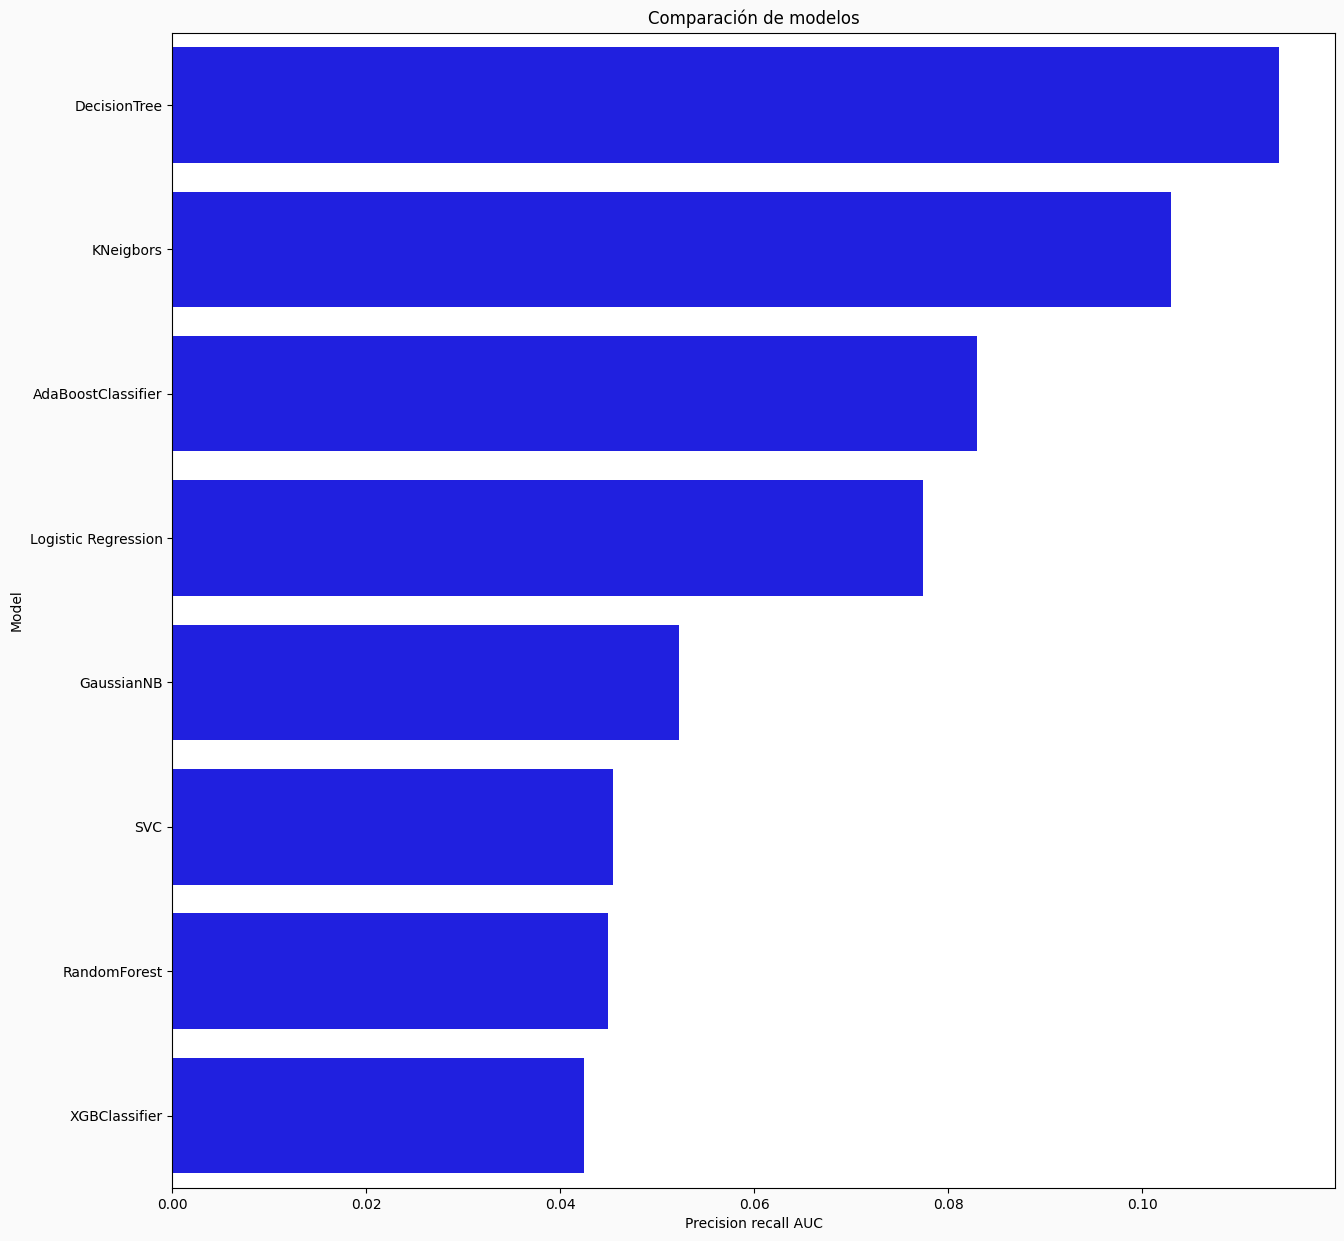

In [52]:
fig = plt.figure(figsize=(15, 15), facecolor=background_color)
sns.barplot(x='Precision recall AUC', y='Model', data=df2, color='b')
plt.title('Comparación de modelos');
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "comp.jpg"))

-- --

### Optuna

Set validacion, CV programado, precision-recall, smote en train solo

In [54]:
def custom_cross_val(model, X, y, synthetic_rows, cv=3):

    sss = StratifiedShuffleSplit(n_splits=cv, test_size=0.2, random_state=42)
    scores = []
    
    for train_index, val_index in sss.split(X, y):

        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        X_val = X_val[~X_val.index.isin(synthetic_rows)]
        y_val = y_val[~y_val.index.isin(synthetic_rows)]

        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_val)[:, 1]

        precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
        auc_precision_recall = auc(recall, precision)
        scores.append(auc_precision_recall)
        
    return np.mean(scores), np.std(scores)

-- --

DecisionTreeClassifier

In [85]:
def objective(trial):

    params = {
            'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            'max_depth' : trial.suggest_int('max_depth', 2, 50),
            'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 5, 100),
            'max_features' : trial.suggest_categorical('max_features', ['sqrt', 'log2']),
            'random_state' : 42,
    }
    model = DecisionTreeClassifier(**params)
    mean, std = custom_cross_val(model, X_train_res, y_train_res, synthetic_rows, cv=3)

    trial.set_user_attr('Standard deviation', std)
   
    return mean

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_trials=300)

[I 2025-04-11 17:59:19,542] A new study created in memory with name: no-name-1affa6e7-2c60-4778-9831-0843080b1118
[I 2025-04-11 17:59:20,679] Trial 0 finished with value: 0.10319793009914575 and parameters: {'criterion': 'log_loss', 'max_depth': 34, 'min_samples_leaf': 71, 'max_features': 'log2'}. Best is trial 0 with value: 0.10319793009914575.
[I 2025-04-11 17:59:22,105] Trial 1 finished with value: 0.12163666894552273 and parameters: {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 24, 'max_features': 'log2'}. Best is trial 1 with value: 0.12163666894552273.
[I 2025-04-11 17:59:23,294] Trial 2 finished with value: 0.10896841357891342 and parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 38, 'max_features': 'log2'}. Best is trial 1 with value: 0.12163666894552273.
[I 2025-04-11 17:59:24,737] Trial 3 finished with value: 0.10247701623759714 and parameters: {'criterion': 'log_loss', 'max_depth': 48, 'min_samples_leaf': 34, 'max_features': 'log2'}. Best

In [86]:
parameters = study.best_params
best_score = round(study.best_value, 3)
deviation = round(study.best_trial.user_attrs['Standard deviation'], 3)

print(f'\033[1mDecisionTreeClassifier Model\033[0m\nBest parameters: {parameters}\nBest Precision-recall score: {best_score}\nStandard deviation: {deviation}')

DecisionTreeClassifier Model
Best parameters: {'criterion': 'entropy', 'max_depth': 33, 'min_samples_leaf': 5, 'max_features': 'log2'}
Best Precision-recall score: 0.274
Standard deviation: 0.014


Precision-recall AUC: 0.09505446638619411


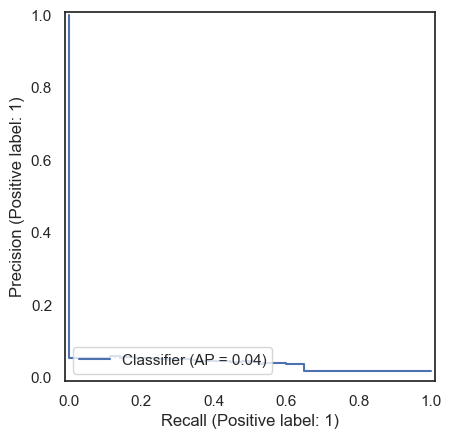

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      8523
           1       0.05      0.36      0.08       157

    accuracy                           0.86      8680
   macro avg       0.52      0.61      0.50      8680
weighted avg       0.97      0.86      0.91      8680

ROC AUC score: 0.6846270600869435
Balanced Accuracy Score:  0.6110554356103493


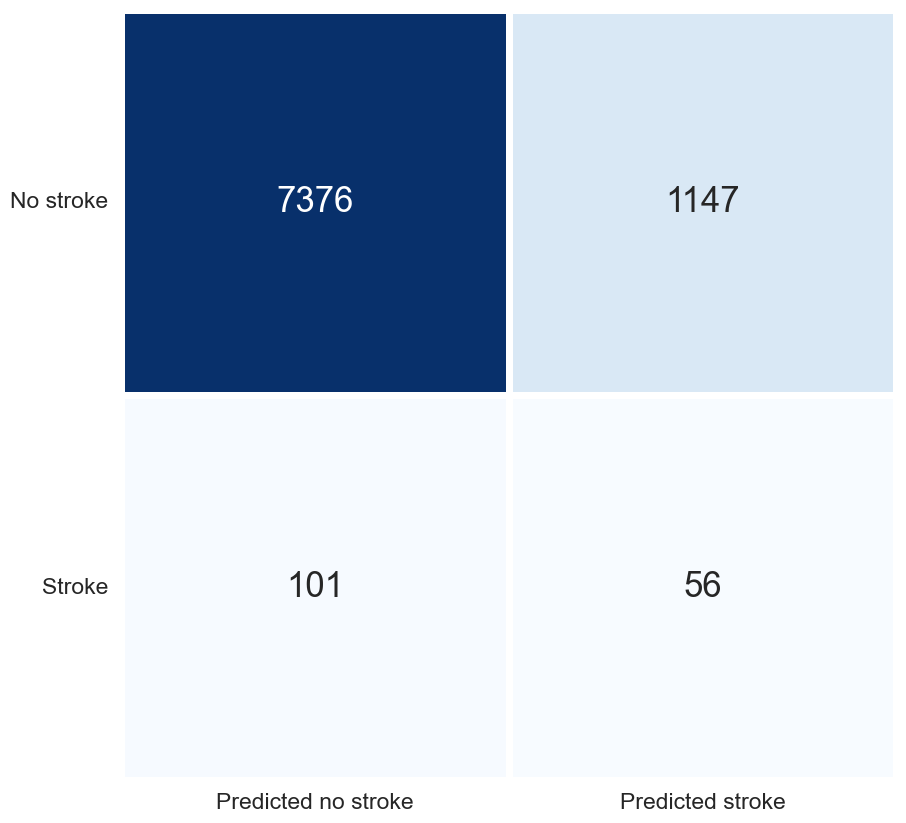

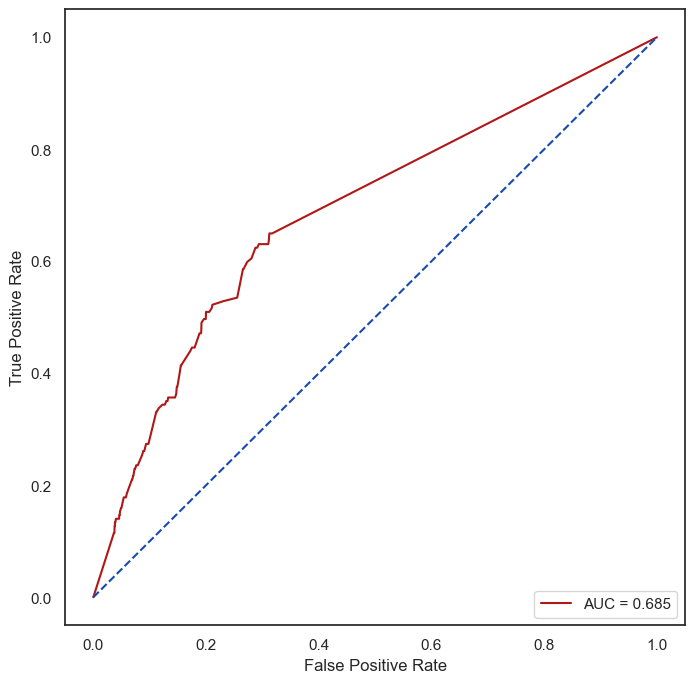

In [ ]:
classifier = DecisionTreeClassifier(**{ 'random_state': 42})
classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
auc_precision_recall = auc(recall, precision)
print(f'Precision-recall AUC: {auc_precision_recall}')

PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.show()

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_DTC.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_DTC.jpg"))

-- --

XGBClassifier

In [139]:
def objective(trial):

    params = {
        'booster' : trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'eta' : trial.suggest_float('eta', 0, 1),
        'max_depth' : trial.suggest_int('max_depth', 1, 300),
        'alpha' : trial.suggest_float('alpha', 0, 0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 0.1),
    }
    model = XGBClassifier(**params)
    mean, std = custom_cross_val(model, X_train_res, y_train_res, synthetic_rows, cv=3)

    trial.set_user_attr('Standard deviation', std)
   
    return mean

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-04-05 18:50:17,957] A new study created in memory with name: no-name-f8192bb3-3f3f-4209-94f6-1f225f6a74a3
[I 2025-04-05 18:52:32,523] Trial 0 finished with value: 0.282394308437584 and parameters: {'booster': 'dart', 'eta': 0.8487087925182486, 'max_depth': 225, 'alpha': 0.09468184040088122, 'reg_lambda': 0.05989601225424145}. Best is trial 0 with value: 0.282394308437584.
[I 2025-04-05 18:52:40,857] Trial 1 finished with value: 0.3104603722246473 and parameters: {'booster': 'gbtree', 'eta': 0.300812638829721, 'max_depth': 169, 'alpha': 0.06720410328326115, 'reg_lambda': 0.04622803762335606}. Best is trial 1 with value: 0.3104603722246473.
[I 2025-04-05 18:54:21,175] Trial 2 finished with value: 0.31998662033000813 and parameters: {'booster': 'dart', 'eta': 0.10866391552447718, 'max_depth': 113, 'alpha': 0.025040538248871414, 'reg_lambda': 0.08481044346514202}. Best is trial 2 with value: 0.31998662033000813.
[I 2025-04-05 18:55:52,581] Trial 3 finished with value: 0.31766462608

In [141]:
parameters = study.best_params
best_score = round(study.best_value, 3)
deviation = round(study.best_trial.user_attrs['Standard deviation'], 3)

print(f'\033[1mXGBClassifier Model\033[0m\nBest parameters: {parameters}\nBest Precision-recall score: {best_score}\nStandard deviation: {deviation}')

XGBClassifier Model
Best parameters: {'booster': 'dart', 'eta': 0.11603681340543932, 'max_depth': 110, 'alpha': 0.05144848621295725, 'reg_lambda': 0.04227697579594064}
Best Precision-recall score: 0.328
Standard deviation: 0.05


Precision-recall AUC: 0.07868537696566197


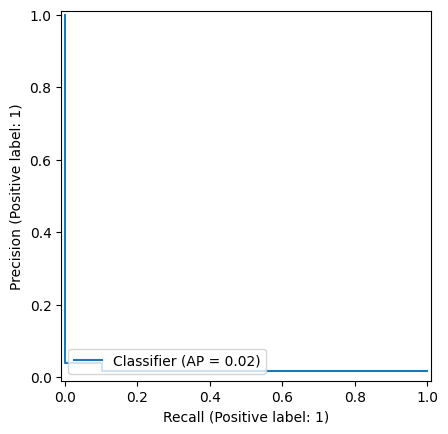

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      8523
           1       0.04      0.10      0.06       157

    accuracy                           0.94      8680
   macro avg       0.51      0.53      0.51      8680
weighted avg       0.97      0.94      0.95      8680

ROC AUC score: 0.7452868259808042
Balanced Accuracy Score:  0.5279588165705237


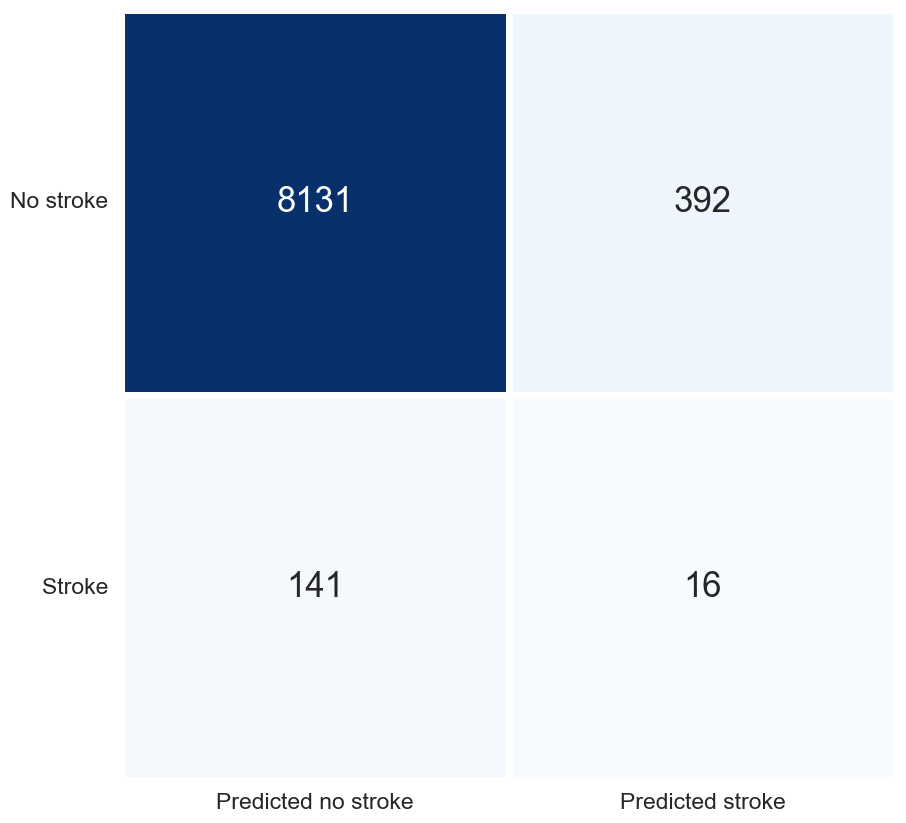

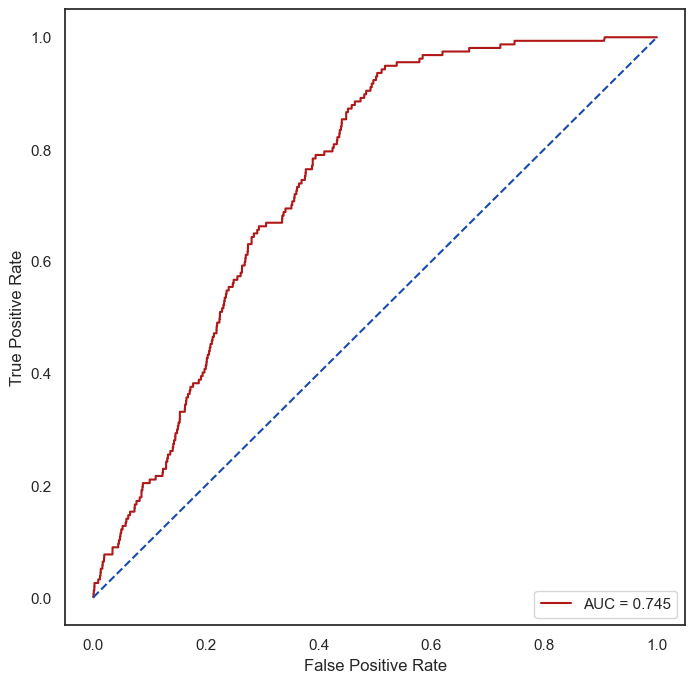

In [ ]:
best_params = {'booster': 'dart', 'eta': 0.11603681340543932, 'max_depth': 110, 'alpha': 0.05144848621295725, 'reg_lambda': 0.04227697579594064}
classifier = XGBClassifier(**best_params)
classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
auc_precision_recall = auc(recall, precision)
print(f'Precision-recall AUC: {auc_precision_recall}')


PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.show()

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_XGB.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_XGB.jpg"))

-- --

KNeighborsClassifier

In [55]:
def objective(trial):

    params = {
            'n_neighbors' : trial.suggest_int('n_neighbors', 2, 7),
            'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
            'algorithm' : trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
            'leaf_size' : trial.suggest_int('leaf_size', 10, 50),
            'p' : trial.suggest_int('p', 1, 3),
    }
    model = KNeighborsClassifier(**params)
    mean, std = custom_cross_val(model, X_train_res, y_train_res, synthetic_rows, cv=3)

    trial.set_user_attr('Standard deviation', std)
   
    return mean

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-04-05 20:13:05,438] A new study created in memory with name: no-name-9f860188-d63c-4aa7-83f0-53b6d41f10e1
[I 2025-04-05 20:13:20,357] Trial 0 finished with value: 0.3977252711323745 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 28, 'p': 2}. Best is trial 0 with value: 0.3977252711323745.
[I 2025-04-05 20:13:42,861] Trial 1 finished with value: 0.40215412098156267 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 44, 'p': 3}. Best is trial 1 with value: 0.40215412098156267.
[I 2025-04-05 20:14:04,925] Trial 2 finished with value: 0.4236851765628154 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 29, 'p': 3}. Best is trial 2 with value: 0.4236851765628154.
[I 2025-04-05 20:14:17,080] Trial 3 finished with value: 0.4232045814184335 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 22, 'p': 1}. Best is 

In [56]:
parameters = study.best_params
best_score = round(study.best_value, 3)
deviation = round(study.best_trial.user_attrs['Standard deviation'], 3)

print(f'\033[1mKNeighborsClassifier Model\033[0m\nBest parameters: {parameters}\nBest Precision-recall score: {best_score}\nStandard deviation: {deviation}')

KNeighborsClassifier Model
Best parameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 13, 'p': 1}
Best Precision-recall score: 0.434
Standard deviation: 0.017


Precision-recall AUC: 0.14527957869921815


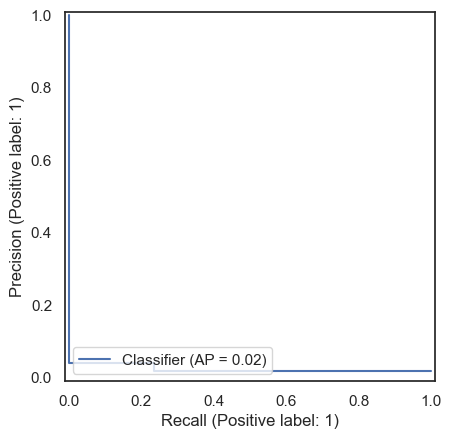

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8523
           1       0.04      0.24      0.07       157

    accuracy                           0.89      8680
   macro avg       0.51      0.57      0.50      8680
weighted avg       0.97      0.89      0.92      8680

ROC AUC score: 0.6053888653482409
Balanced Accuracy Score:  0.5671480168685558


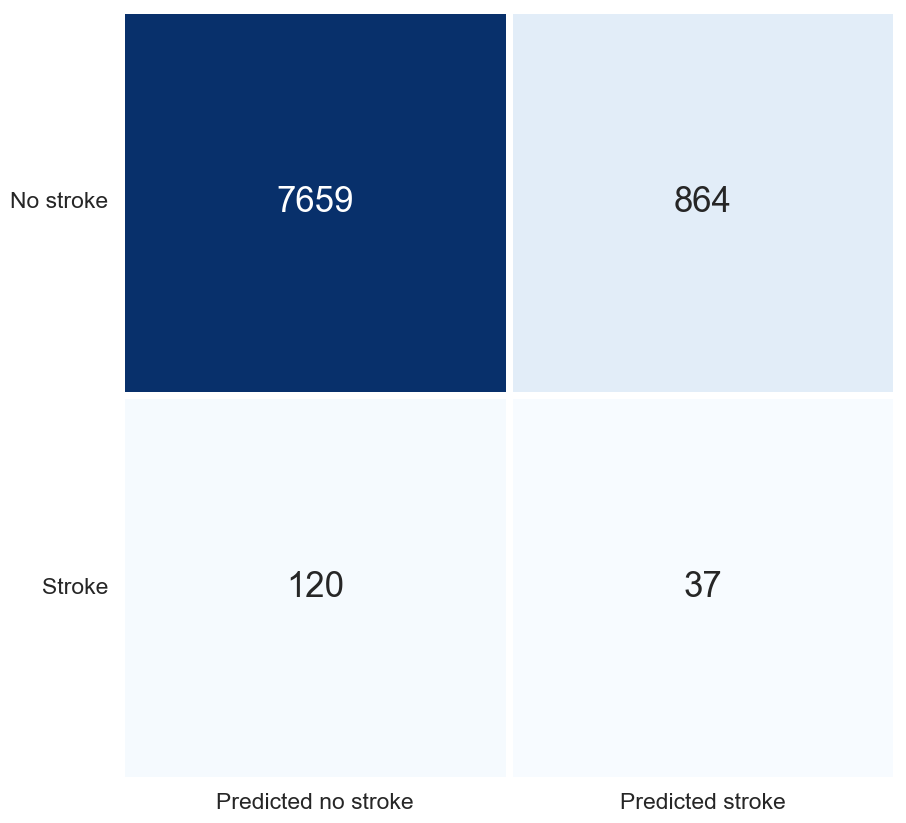

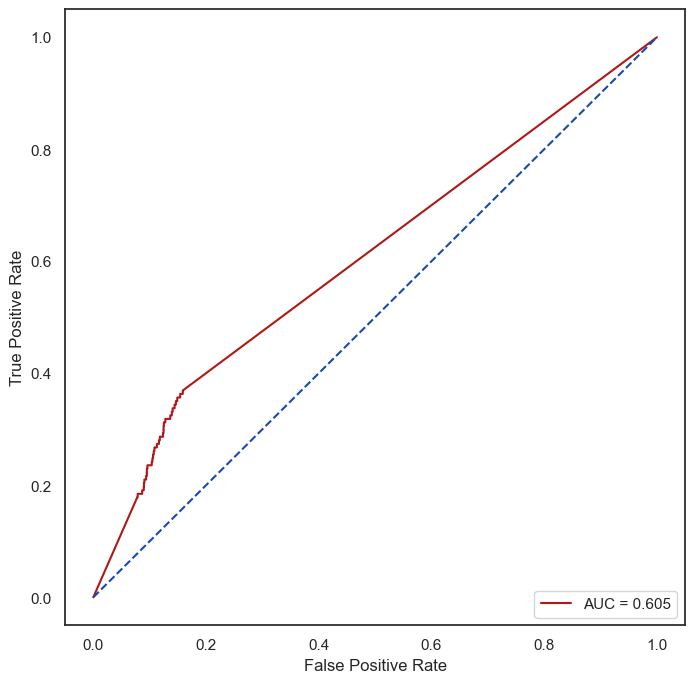

In [ ]:
best_params = study.best_params
classifier = KNeighborsClassifier(**best_params)
classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
auc_precision_recall = auc(recall, precision)
print(f'Precision-recall AUC: {auc_precision_recall}')


PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.show()

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_KNN.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_KNN.jpg"))

-- --

GaussianNB

In [69]:
def objective(trial):

    params = {
                'var_smoothing' : 10**trial.suggest_float('var_smoothing', -11, -7)
    }    
    model = GaussianNB(**params)
    mean, std = custom_cross_val(model, X_train_res, y_train_res, synthetic_rows, cv=3)

    trial.set_user_attr('Standard deviation', std)
   
    return mean

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-04-09 21:48:13,164] A new study created in memory with name: no-name-99667b5e-e2cf-4813-9330-455077086faf
[I 2025-04-09 21:48:14,419] Trial 0 finished with value: 0.07325969290101379 and parameters: {'var_smoothing': -7.59103801567726}. Best is trial 0 with value: 0.07325969290101379.
[I 2025-04-09 21:48:15,847] Trial 1 finished with value: 0.07325969290101379 and parameters: {'var_smoothing': -7.373709054535118}. Best is trial 0 with value: 0.07325969290101379.
[I 2025-04-09 21:48:17,983] Trial 2 finished with value: 0.07315033157118002 and parameters: {'var_smoothing': -8.629335432476484}. Best is trial 0 with value: 0.07325969290101379.
[I 2025-04-09 21:48:19,662] Trial 3 finished with value: 0.07325969290101379 and parameters: {'var_smoothing': -7.0541713426489885}. Best is trial 0 with value: 0.07325969290101379.
[I 2025-04-09 21:48:20,714] Trial 4 finished with value: 0.07314576097837415 and parameters: {'var_smoothing': -8.867612120234744}. Best is trial 0 with value: 0.

In [70]:
parameters = study.best_params
best_score = round(study.best_value, 3)
deviation = round(study.best_trial.user_attrs['Standard deviation'], 3)

print(f'\033[1mGaussianNB Model\033[0m\nBest parameters: {parameters}\nBest Precision-recall score: {best_score}\nStandard deviation: {deviation}')

GaussianNB Model
Best parameters: {'var_smoothing': -10.961091867947742}
Best Precision-recall score: 0.085
Standard deviation: 0.017


Precision-recall AUC: 0.05228113959895878


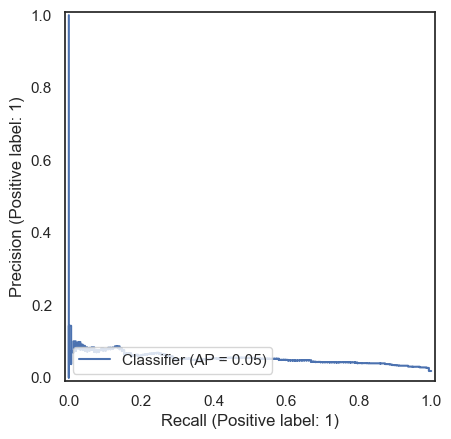

              precision    recall  f1-score   support

           0       1.00      0.21      0.35      8523
           1       0.02      0.99      0.04       157

    accuracy                           0.23      8680
   macro avg       0.51      0.60      0.20      8680
weighted avg       0.98      0.23      0.35      8680

ROC AUC score: 0.7886726138563991
Balanced Accuracy Score:  0.6038198624777765


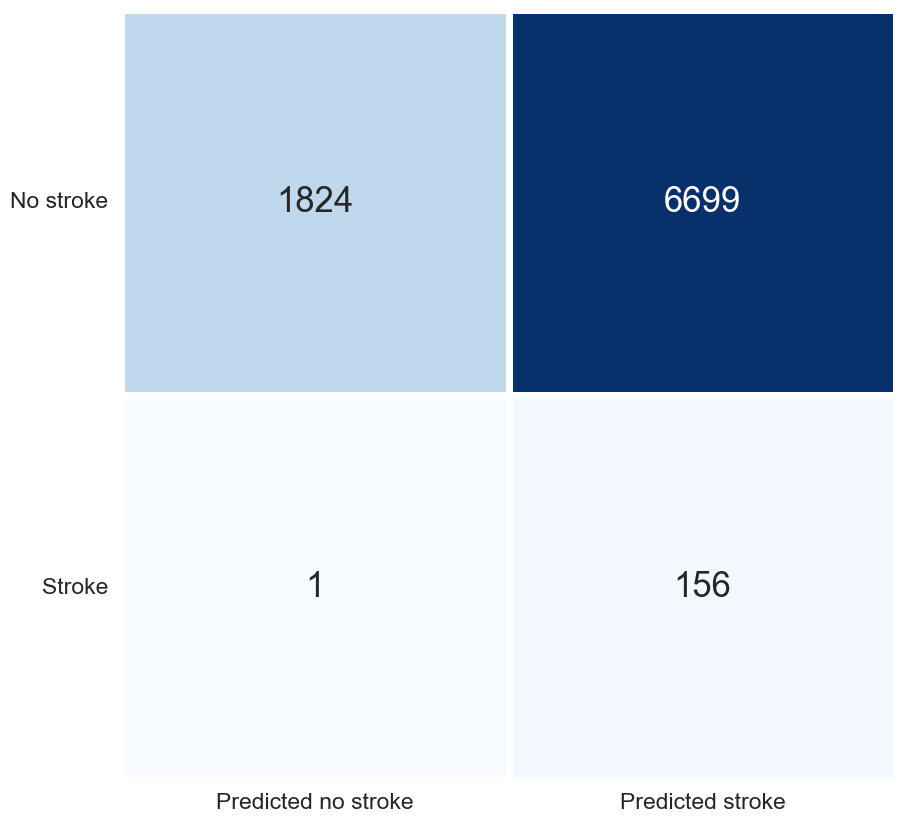

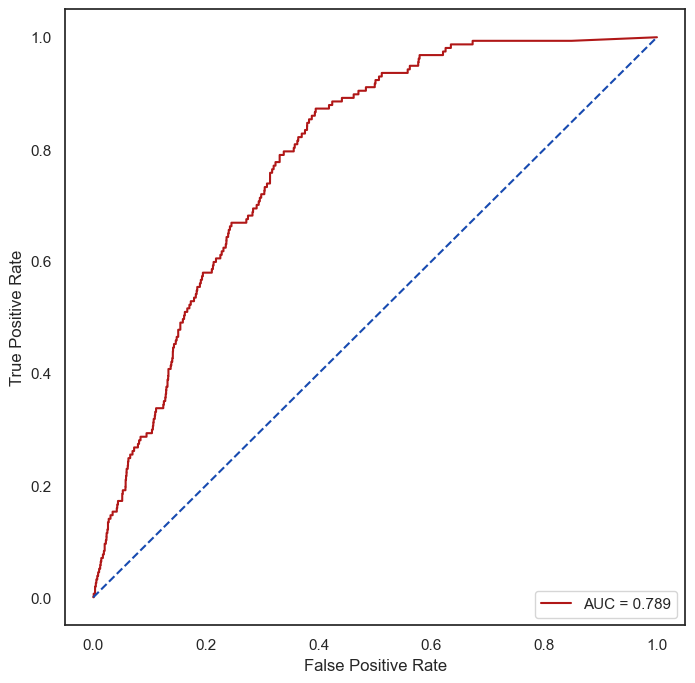

In [71]:
classifier = GaussianNB(var_smoothing=10**(-10.961082192480285))
classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
auc_precision_recall = auc(recall, precision)
print(f'Precision-recall AUC: {auc_precision_recall}')


PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.show()

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_NB.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_NB.jpg"))

-- --

AdaBoostClassifier

In [75]:
def objective(trial):

    params = {
                'n_estimators' : trial.suggest_int('n_estimators', 1, 100),
                'learning_rate' : trial.suggest_float('learning_rate', 0.1, 3.0),
    }    
    model = AdaBoostClassifier(**params)
    mean, std = custom_cross_val(model, X_train_res, y_train_res, synthetic_rows, cv=3)

    trial.set_user_attr('Standard deviation', std)
   
    return mean

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-04-09 23:38:29,607] A new study created in memory with name: no-name-bb5b359d-7ee5-43fd-be38-55bccc49362b
[I 2025-04-09 23:38:34,810] Trial 0 finished with value: 0.07312761158133198 and parameters: {'n_estimators': 24, 'learning_rate': 2.7315779599102252}. Best is trial 0 with value: 0.07312761158133198.
[I 2025-04-09 23:38:51,698] Trial 1 finished with value: 0.06664761640476546 and parameters: {'n_estimators': 82, 'learning_rate': 1.7564232331798255}. Best is trial 0 with value: 0.07312761158133198.
[I 2025-04-09 23:39:03,883] Trial 2 finished with value: 0.4614406962260393 and parameters: {'n_estimators': 57, 'learning_rate': 2.822106953275358}. Best is trial 2 with value: 0.4614406962260393.
[I 2025-04-09 23:39:26,352] Trial 3 finished with value: 0.07756502802830963 and parameters: {'n_estimators': 91, 'learning_rate': 1.4820498118601215}. Best is trial 2 with value: 0.4614406962260393.
[I 2025-04-09 23:39:44,491] Trial 4 finished with value: 0.4469505566837047 and parame

In [76]:
best_params = study.best_params
best_score = round(study.best_value, 3)
deviation = round(study.best_trial.user_attrs['Standard deviation'], 3)

print(f'\033[1mAdaBoostClassifier Model\033[0m\nBest parameters: {best_params}\nBest Precision-recall score: {best_score}\nStandard deviation: {deviation}')

AdaBoostClassifier Model
Best parameters: {'n_estimators': 5, 'learning_rate': 1.743352384014209}
Best Precision-recall score: 0.462
Standard deviation: 0.004


Precision-recall AUC: 0.4343888388845238


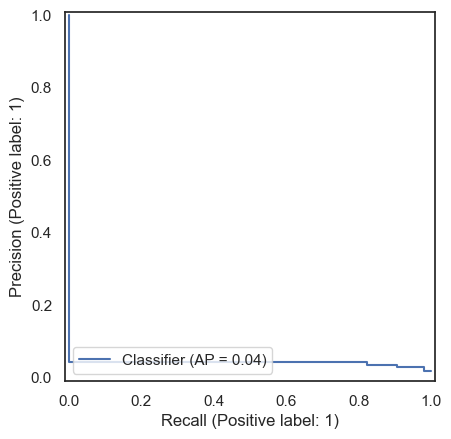

              precision    recall  f1-score   support

           0       1.00      0.53      0.69      8523
           1       0.03      0.90      0.07       157

    accuracy                           0.54      8680
   macro avg       0.52      0.72      0.38      8680
weighted avg       0.98      0.54      0.68      8680

ROC AUC score: 0.769912585727193
Balanced Accuracy Score:  0.7183914488409406


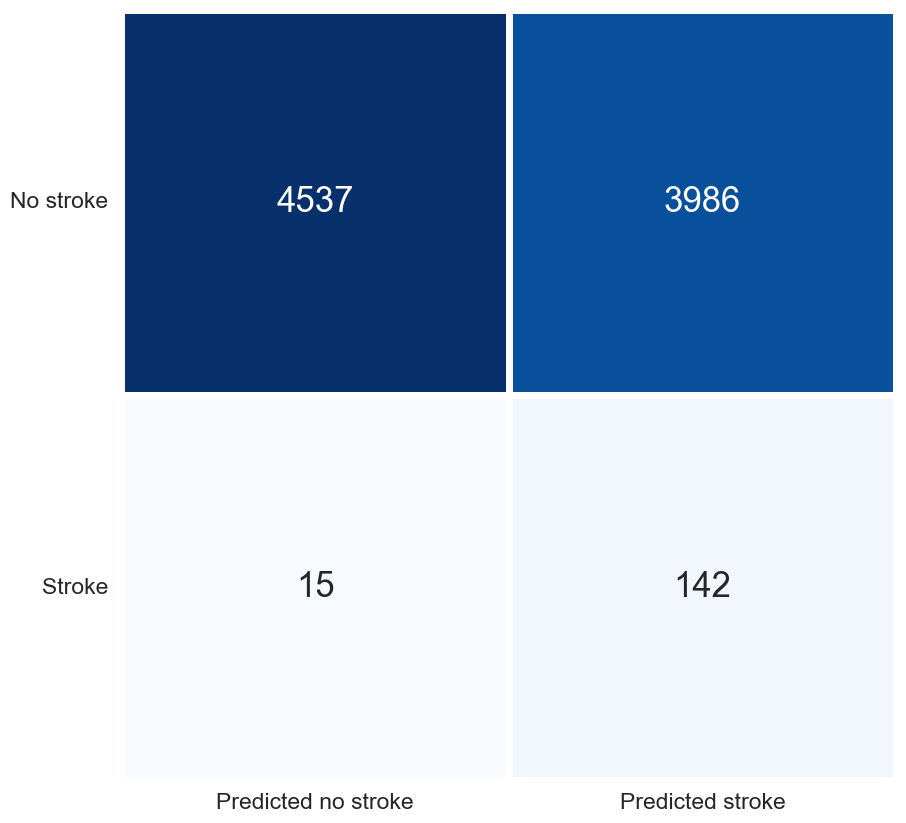

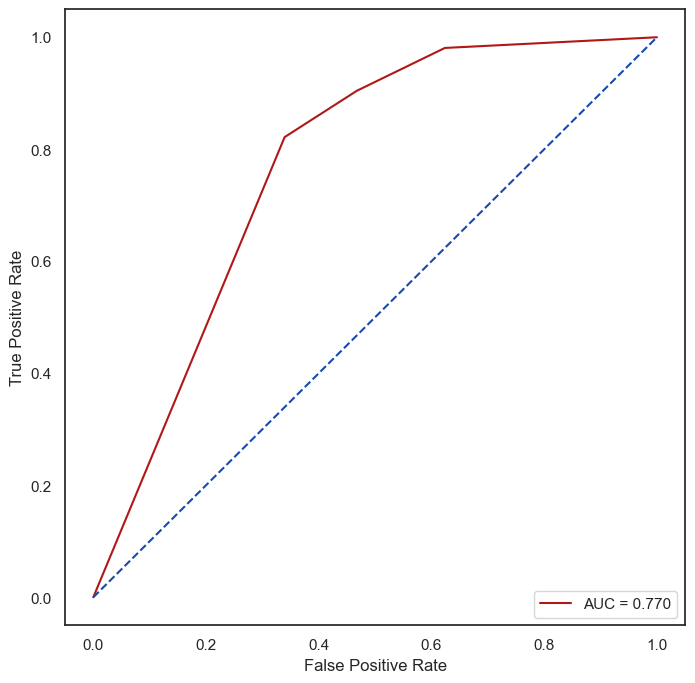

In [82]:
classifier = AdaBoostClassifier(**best_params)
classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
auc_precision_recall = auc(recall, precision)
print(f'Precision-recall AUC: {auc_precision_recall}')


PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.show()

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))


# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_ADA.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_ADA.jpg"))

-- --

Logistic Regression

In [57]:
def objective(trial):

    params = {
        'tol' : trial.suggest_uniform('tol' , 1e-6 , 1e-3),
        'C' : trial.suggest_loguniform("C", 1e-2, 1)
    }   
    model = LogisticRegression(**params)
    mean, std = custom_cross_val(model, X_train_res, y_train_res, synthetic_rows, cv=3)

    trial.set_user_attr('Standard deviation', std)
   
    return mean

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_trials=200)

[I 2025-04-09 19:37:13,814] A new study created in memory with name: no-name-af53c9f3-1805-473a-be8e-7d9f1682cd0a
[I 2025-04-09 19:37:15,362] Trial 0 finished with value: 0.078840384040143 and parameters: {'tol': 0.0005198437936495196, 'C': 0.050283091437078944}. Best is trial 0 with value: 0.078840384040143.
[I 2025-04-09 19:37:16,460] Trial 1 finished with value: 0.07961632159244812 and parameters: {'tol': 0.00042805915017257793, 'C': 0.01443072976251287}. Best is trial 1 with value: 0.07961632159244812.
[I 2025-04-09 19:37:17,518] Trial 2 finished with value: 0.0791867358688343 and parameters: {'tol': 0.0009948522319715542, 'C': 0.030979770411892402}. Best is trial 1 with value: 0.07961632159244812.
[I 2025-04-09 19:37:18,897] Trial 3 finished with value: 0.07868627697818655 and parameters: {'tol': 0.0005851548895157919, 'C': 0.2683117007694377}. Best is trial 1 with value: 0.07961632159244812.
[I 2025-04-09 19:37:20,358] Trial 4 finished with value: 0.07958937938298177 and paramete

In [58]:
best_params = study.best_params
best_score = round(study.best_value, 3)
deviation = round(study.best_trial.user_attrs['Standard deviation'], 3)

print(f'\033[1mLogisticRegression Model\033[0m\nBest parameters: {best_params}\nBest Precision-recall score: {best_score}\nStandard deviation: {deviation}')

LogisticRegression Model
Best parameters: {'tol': 0.00012120113828163939, 'C': 0.010899471252549022}
Best Precision-recall score: 0.08
Standard deviation: 0.007


Precision-recall AUC: 0.0784080232465498


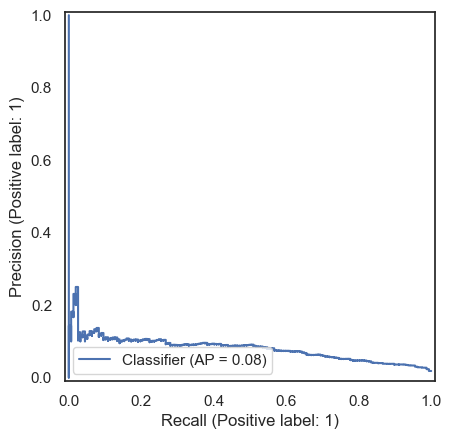

              precision    recall  f1-score   support

           0       0.99      0.75      0.86      8523
           1       0.05      0.75      0.10       157

    accuracy                           0.75      8680
   macro avg       0.52      0.75      0.48      8680
weighted avg       0.98      0.75      0.84      8680

ROC AUC score: 0.8306433472260523
Balanced Accuracy Score:  0.7486527649798858


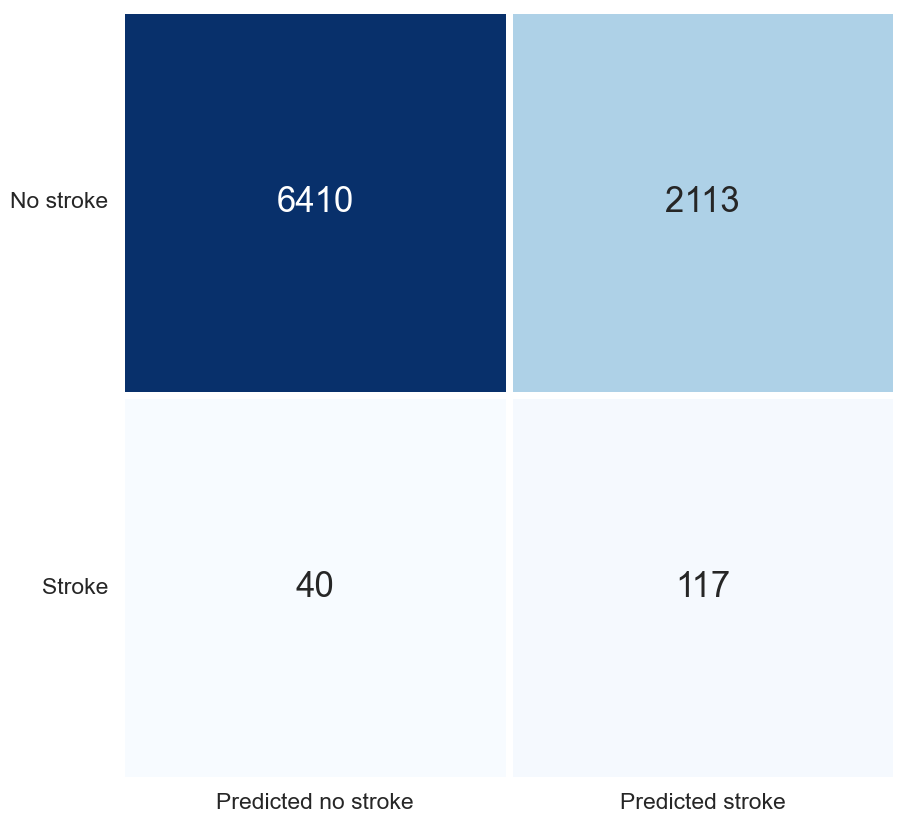

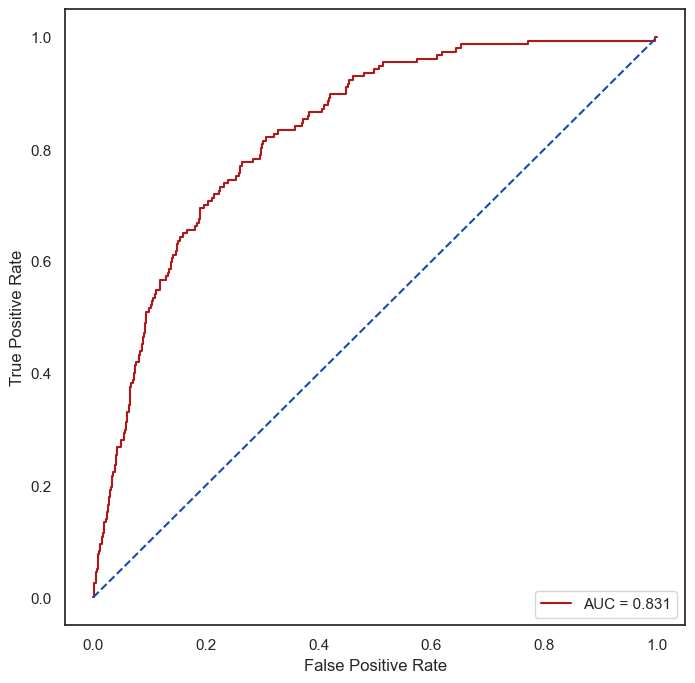

In [66]:
classifier = LogisticRegression(**best_params)
classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
auc_precision_recall = auc(recall, precision)
print(f'Precision-recall AUC: {auc_precision_recall}')


PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.show()

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))


# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_LR.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_LR.jpg"))

-- --

### Guardamos modelo escogido

In [23]:
best_model = GaussianNB(var_smoothing=10**(-7.000577727631357))
best_model.fit(X, y)

GaussianNB(var_smoothing=9.986706173812031e-08)

In [24]:
name = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'model', 'modelo')
with open(name, 'wb') as file:  
    pickle.dump(best_model, file)

In [25]:
with open(name, 'rb') as file:  
    model = pickle.load(file)

In [26]:
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
auc

0.703456956133716